### Predict the percentage of an student based on the no. of study hours.Data can be found at http://bit.ly/w-data
### What will be predicted score if a student studies for 9.25 hrs/ day?
### Given, Use simple linear regression task as it involves just 2 variables

In [76]:
# Importing all libraries required in this notebook
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression  
%matplotlib inline  

##### Importing data

In [77]:
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

In [78]:
# display top 10 rows in the dataset
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [79]:
# display last 10 rows in the dataset
student_data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [80]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


dataset containes 25 rows and 2 columns. dataset has no NULL values. 

In [81]:
student_data.shape

(25, 2)

In [82]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


min hours spent is 1.10 and max is 9.2 hrs by the students

The min % score that a student got is 17% and max is 95%


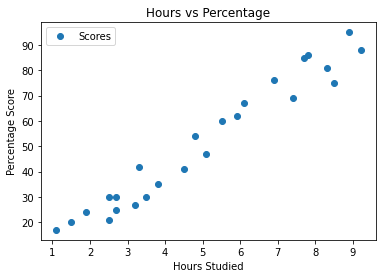

In [83]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score that a student got

##### check for outliers in the dataset

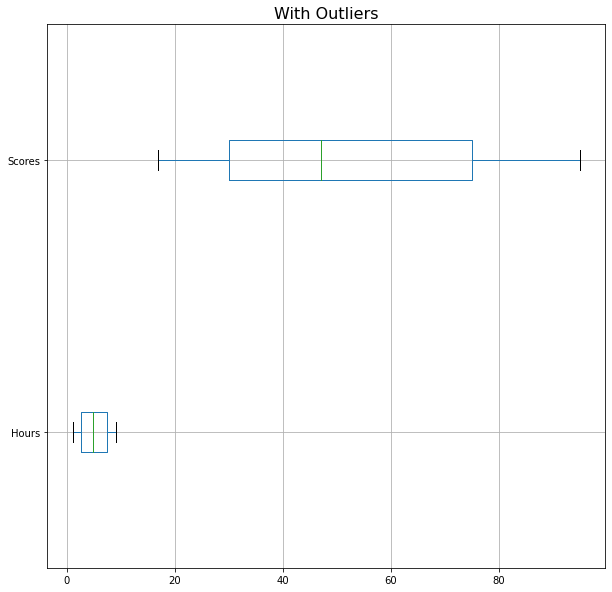

In [84]:
# construct box plot for continuous variables

plt.figure(figsize=(10,10))
student_data.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

there are no outliers present in the dataset

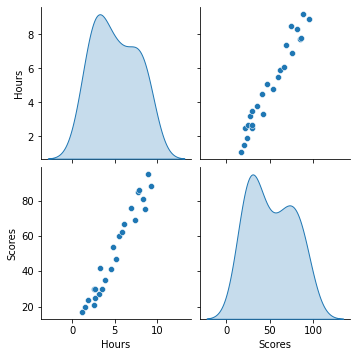

In [85]:

sns.pairplot(student_data, diag_kind='kde')  
plt.show()

##### Train-Test split

In [86]:
# Copy all the predictor variables into X dataframe
X = student_data.drop('Scores', axis=1)

# Copy target into the y dataframe. 
y = student_data[['Scores']]

In [87]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.20, random_state=0) 

##### Training the Algorithm

In [88]:

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [89]:
regression_model.intercept_

array([2.01816004])

In [90]:
# R square on training data
regression_model.score(X_train, y_train)

0.9515510725211552

In [91]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9454906892105356

In [92]:

y_pred_test = regression_model.predict(X_test) # Predicting the scores

In [93]:

print( X_test)


    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [94]:
y_pred_test

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [95]:
y_pred_train = regression_model.predict(X_train) # Predicting the scores

In [96]:
print( X_train)

    Hours
22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7
7     5.5
20    2.7
3     8.5
0     2.5
21    4.8
15    8.9
12    4.5


In [97]:
y_pred_train

array([[39.67865467],
       [20.84840735],
       [79.32128059],
       [70.40168976],
       [12.91988217],
       [52.56250809],
       [78.33021494],
       [34.72332643],
       [84.27660883],
       [93.19619966],
       [62.47316457],
       [36.70545772],
       [28.77693254],
       [56.52677068],
       [28.77693254],
       [86.25874013],
       [26.79480124],
       [49.58931115],
       [90.22300272],
       [46.6161142 ]])

In [98]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regression_model.predict(hours)
print("No of Hours :",hours)
print("Predicted Score : ",own_pred[0])

No of Hours : [[9.25]]
Predicted Score :  [93.69173249]


##### Model Evaluation:


In [99]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
